<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentador

Se define $g:\mathbb{R}^n\times (\mathbb{R}^{3})^n⟶ \mathbb{R}$ como

$$g\left(\alpha^{j}, \mu^{j}\right)=\sum_{c \in \Omega}\left[h^{j}(c)-\sum_{i=1}^n \alpha_{i}^{j} \exp \left(\frac{-\left\|c-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right]^{2}$$
Para $j=1,2$,

$\alpha^{j}=\left[\alpha_{1}^{j}, \alpha_{2}^{j}, \ldots, \alpha_{n}^{j}\right]$ son los pesos de la combinación lineal de la base radial. 

$\mu^{j}=\left[\mu_{1}^{j}, \mu_{2}^{j}, \ldots, \mu_{n}^{j}\right]$ son las medias de los elementos de la base radial. I.e. $\mu^{j}_{i}\in\mathbb{R}^3$

Parámetros como los histogramas $h^j$, un espacio de colores $\Omega=\{0,1,\ldots,b\}^3$ y un parámetro de amplitud $\sigma$ se consideran dados y fijos.
##
Calculamos el gradiente de la función $g$, para cada $i\leq n$:

$$\frac{\partial g}{\partial \alpha^j_i}=-2\sum\limits_{c \in \Omega}\left[\left[h^{j}(c)-\sum_{i=1}^n \alpha_{i}^{j} \exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right]\exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right] $$
$$\frac{\partial g}{\partial \mu^j_i}=-2\sum\limits_{c \in \Omega}\left[\left[h^{j}(c)-\sum_{i=1}^n \alpha_{i}^{j} \exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right]\alpha_i^j\exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\frac{2\left(h^j(c)-\mu_{i}^{j}\right)}{2 \sigma^{2}}\right] $$

De igual manera, calculamos la matriz Hessiana, a partir de las derivadas parciales:

$$\frac{\partial^2 g}{\partial \alpha_i^j\partial\alpha_k^j }=2\exp\left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\sum\limits_{c \in \Omega}\left[\exp \left(\frac{-\left\|h^j(c)-\mu_{k}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right]$$
$$\frac{\partial^2 g}{\partial \alpha_i^j\partial\mu_k^j }=2\exp\left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\sum\limits_{c \in \Omega}\left[\alpha_k^jexp\left(\frac{-\left\|h^j(c)-\mu_{k}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\left(\frac{2\left(h^j(c)-\mu_{i}^{j}\right)}{2 \sigma^{2}}\right)\right]+\chi_{\{i\}}(k)2\sum\limits_{c \in \Omega}\left[h^{j}(c)-\sum_{i=1}^n \alpha_{i}^{j} \exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right]\exp\left(\frac{-\left\|h^j(c)-\mu_{k}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\frac{2(h^j(c)-\mu_k^j)}{2\sigma^2}$$
$$\frac{\partial^2 g}{\partial \mu_i^j\partial\mu_k^j }=\left[2\sum\limits_{c \in \Omega}\left[\exp \left(\frac{-\left\|h^j(c)-\mu_{k}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\right]\right]\left[\alpha_{i}^{j} \exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\frac{h^j(c)-\mu_i^j}{\sigma^2}\right]\chi_{\{i\}}(k)-2\alpha_{i}^{j} \exp \left(\frac{-\left\|h^j(c)-\mu_{i}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\frac{h^j(c)-\mu_i^j}{\sigma^2}\sum\limits_{c \in \Omega}\left[\alpha_k^j\exp \left(\frac{-\left\|h^j(c)-\mu_{k}^{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)\frac{h^j(c)-\mu_i^j}{\sigma^2}\right]$$ 

In [1]:
import numpy as np
sigma_sq=0.5


In [293]:
n_bins=8
hist_obj=np.loadtxt('H_0.txt',skiprows=1)
hist_fondo=np.loadtxt('H_0.txt',skiprows=1)
def h(c,obj):
    if(obj=='obj'):
        return hist_obj[int(c[0]*(n_bins)**2+c[1]*(n_bins)+c[2])]
    else:
        return hist_fondo[int(c[0]*(n_bins)**2+c[1]*(n_bins)+c[2])]
obj='obj'
def comb_base(Alpha_Mu,c):#Recibe una lista que es una mezcla de escalares y arreglos, y c un arreglo
    n=int(len(Alpha_Mu)/2)
    suma=0
    for i in range(n):
        suma+=Alpha_Mu[i]*np.exp(-(np.linalg.norm(c-Alpha_Mu[n+i])**2)/(2*sigma_sq))
    return suma
def fun_obj(Alpha_Mu):#Recibe un solo arreglo
    g=0
    for r in range(n_bins):
        for gr in range(n_bins):
            for b in range(n_bins):
                #c=(r,g,b)
                c=np.array([int(r),int(gr),int(b)])
                g+=(h(c=c,obj=obj)-comb_base(Alpha_Mu,c))**2
    return g
def fun_obj_r4n(Alpha_Mu_array):
    Alpha_mu_list=convertir(Alpha_Mu_array)
    return fun_obj(Alpha_mu_list)
fun_obj_r4n([1,1,1,1,2,4,2,5,6,3,6,9])

7585302.714686411

In [288]:
def GC(f,grad_f,Hessian_f,x_0,tol_g=10**(-1),max_iter=10**3):
    n=len(x_0)#Dimension del espacio
    d_0=np.array(-grad_f(x_0))
    k=0
    while(np.linalg.norm(grad_f(x_0))>=tol_g and k<max_iter):
        H=Hessian_f(x_0)
        alpha_k_gc=-(np.dot(grad_f(x_0),d_0))/(np.dot(d_0,np.dot(H,d_0)))#Tam. de paso
        x_0=x_0+alpha_k_gc*np.array(d_0)
        g_km1=grad_f(x_0)
        beta_k_gc=(np.dot(d_0,np.dot(H,g_km1))/(np.dot(d_0,np.dot(H,d_0))))
        d_0=-g_km1+beta_k_gc*d_0
        k+=1
    print("iter",k)
    return x_0

In [297]:
from scipy import optimize
n=3 #Base radial
Alpha_Mu=[1,1,1,4,2,1,4,2,1,4,2,1]
def convertir(array):#De arreglo de floats a lista de escalares y vectores.
    u=[]
    for j in range(n):
        u.append(array[j])
    w=np.split(np.array(array[n:]),n)
    for r in w:
        u.append(r)
    return u
def convertir_back(array_mixed):
    u=[]
    for i in array_mixed:
        if(type(i)!=type(np.array([0,0]))):
            u.append(i)
        else:
            for j in range(len(i)):
                u.append(i.tolist()[j])
    return u
#Quiero pensarla como una funcion(alpha,mu), donde mu tiene tamaño 3*n
def grad_f(Alpha_Mu):
    return optimize.approx_fprime(xk=Alpha_Mu, f=fun_obj_r4n,epsilon=10**(-6))
def Hessian_f(Alpha_Mu):
  N = len(Alpha_Mu)
  hessian = np.zeros((N,N)) 
  gd_0 = grad_f(Alpha_Mu)
  eps = np.linalg.norm(gd_0) * np.finfo(np.float32).eps 
  for i in range(N):
    xx0 = 1.*Alpha_Mu[i]
    Alpha_Mu[i] = xx0 + eps
    gd_1 =  grad_f(Alpha_Mu)
    hessian[:,i] = ((gd_1 - gd_0)/eps)
    Alpha_Mu[i] =xx0
  return hessian
Hessian_f(Alpha_Mu)

array([[-3304.78336642, -3304.78336642, -3304.78336642, -2937.5852146 ,
        -1101.59445547,     0.        , -2937.5852146 , -1101.59445547,
            0.        , -2937.5852146 , -1101.59445547,     0.        ],
       [-3304.78336642, -3304.78336642, -3304.78336642, -2937.5852146 ,
        -1101.59445547,     0.        , -2937.5852146 , -1101.59445547,
            0.        , -2937.5852146 , -1101.59445547,     0.        ],
       [-3304.78336642, -3304.78336642, -3304.78336642, -2937.5852146 ,
        -1101.59445547,     0.        , -2937.5852146 , -1101.59445547,
            0.        , -2937.5852146 , -1101.59445547,     0.        ],
       [ -367.19815182,  -367.19815182,  -367.19815182, -1468.7926073 ,
         1101.59445547,  1101.59445547, -1468.7926073 ,  1101.59445547,
         1101.59445547, -1468.7926073 ,  1101.59445547,  1101.59445547],
       [    0.        ,     0.        ,     0.        ,  -367.19815182,
        -1101.59445547,   734.39630365,  -367.19815182, -110

In [305]:
def optimizador_alternado(Alpha_Mu_0,tol_g=10**(-1),max_iter=10**3):
    #Definir gradientes parciales g_alpha_k, g_mu_k
    #minimizar g(g_alpha_k,g_mu_k) como función de g_alpha_k
    #Ese minimo es alpha_k+1
    #minimizar g(g_alpha_k+1,g_mu_k) como función de g_mu_k
    #Ese minimo es mu_k+1
    k=0
    n=int(len(Alpha_Mu)/4)
    Alpha_0, Mu_01,Mu_02,Mu_03=np.split(np.array(Alpha_Mu_0),4) #Condicion inicial
    Mu_0=np.concatenate((Mu_01,Mu_02,Mu_03))
    print(Alpha_0,Mu_0)
    #while(np.linalg.norm(grad_g)>tol_g):
    for i in range(1):
        def fun_obj_alpha(Alpha_1):
            return fun_obj(np.concatenate((Alpha_1,Mu_0)))
        def fun_obj_mu(Mu_1):
            return fun_obj(np.concatenate((Alpha_0,Mu_1)))
        def grad_fun_obj_alpha(Alpha_1):
            return np.split(grad_f(np.concatenate((Alpha_1,Mu_0))),4)[0]
        def grad_fun_obj_mu(Mu_1):
            return np.split(grad_f(np.concatenate((Alpha_0,Mu_1))),4)[1:]
        def Hessian_fun_obj_alpha(Alpha_1):
            return np.array(Hessian_f(np.concatenate((Alpha_1,Mu_0))))[0:n,0:n]
        def Hessian_fun_obj_mu(Mu_1):
            return np.array(Hessian_f(np.concatenate((Alpha_0,Mu_1))))[n:,n:]
        Alpha_1=GC(f=fun_obj_alpha,grad_f=grad_fun_obj_alpha, Hessian_f=Hessian_fun_obj_alpha,x_0=np.array(Alpha_0))#Calcular minimo.
        Alpha_0=Alpha_1 #Actualizamos
        Mu_1=GC(f=fun_obj_mu,grad_f=grad_fun_obj_mu, Hessian_f=Hessian_fun_obj_mu,x_0=np.array(Mu_0))#Calcular minimo.
        Mu_0=Mu_1 #Actulizamos
        #Eso fue una iteracion
        print(Alpha_0,Mu_0)

In [306]:
u=optimizador_alternado(Alpha_Mu_0=np.array(Alpha_Mu),tol_g=10**(-3),max_iter=10**3)


[1. 1. 1.] [4. 2. 1. 4. 2. 1. 4. 2. 1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


iter 2


TypeError: ignored

In [191]:
print(fun_obj([.1,.2,.3,.4,.5,.6]))
print(fun_obj([ 882.88641307, 3012.0808042,  2004.02758718, 95.45542611, -38.46668854 , 37.96364189]))

7585746.944873892
7565020.841263569


In [203]:
def print_seleccion(img):
    for i in range(500):
        for j in range(500):
            c=img[i,j] #(es un vector)
            #Asignar etiqueta a ese pixel
            img[i,j,0]=255
            img[i,j,1]=0
            img[i,j,2]=0
    return img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


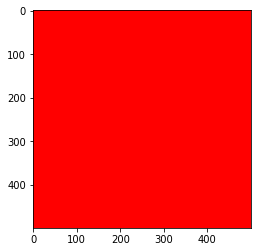

In [202]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Strokes.png')
imgplot = plt.imshow(print_seleccion(img))
plt.show()